In [49]:
%matplotlib inline
import datetime
from IPython.display import display, set_matplotlib_formats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] =  (10, 4)
set_matplotlib_formats('png') # png or svg figures. SVG will scale better but bogs browser down with many  datapoints
#import seaborn as sbn
#sbn.set()
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Matplotlib version', mpl.__version__)
#print('Seaborn version', sbn.__version__)

Numpy version 1.9.2
Pandas version 0.16.0
Matplotlib version 1.3.1


In [47]:
def custom_date_parser(s):
    ''' Custom date parser speeds up import of csv files from ~24s per file to 2.3s per file on my development server
    '''
    return datetime.datetime(2000+int(s[0:2]), 
                             int(s[2:4]), 
                             int(s[4:6]), 
                             int(s[6:8]))

ndays = 24
df = pd.read_fwf('30STOR10.TXT', index_col='hour', parse_dates=True, date_parser=custom_date_parser,
                          skiprows=2, nrows=24*ndays,
                          names=['hour', 'S', 'Demand', 'Renewable', 'D_R_N', 'Fossil', 'Storage',
                                 'STORHR', 'Smooth', 'R1', 'R2', 'LOLP'],
                         colspecs=[(120, 129), (130, 131), (133, 139), (141, 147),
                                   (149, 155), (157, 165), (165, 171), (173, 179),
                                   (181, 187), (189, 195), (197, 203), (205, 215)])
df['Nuclear'] = df.Demand - df.Renewable - df.Fossil - df.Storage
df['Storage_out'] = df.Storage.where(df.Storage >= 0,  other=0)
df['Storage_in'] = df.Storage.where(df.Storage <= 0,  other=0)
display(df.head())

,S,Demand,Renewable,D_R_N,Fossil,Storage,STORHR,Smooth,R1,R2,LOLP,Nuclear,Storage_out,Storage_in
hour,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,42866,9648,28068,23332,4736,3.526,28482,9114,-14383,0,5150,4736,0
2010-01-01 01:00:00,1,42739,9933,27656,22230,5425,2.984,27380,9114,-16504,0,5151,5425,0
2010-01-01 02:00:00,1,42906,10027,27729,21236,6493,2.334,26386,9114,-17348,0,5150,6493,0
2010-01-01 03:00:00,1,43009,10423,27435,20430,7005,1.634,25580,9114,-17348,0,5151,7005,0
2010-01-01 04:00:00,1,43569,11892,26526,20020,6505,0.983,25170,9114,-17348,0,5152,6505,0


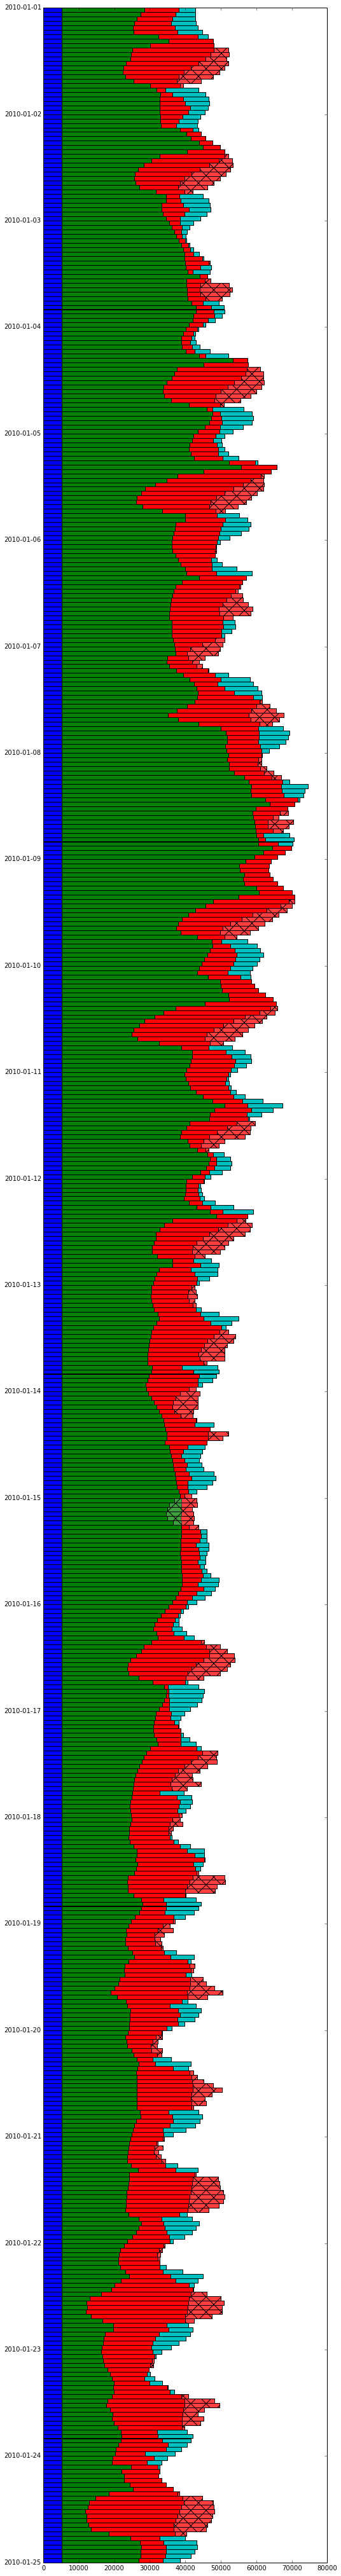

In [51]:

sources = ['Nuclear', 'Fossil', 'Renewable', 'Storage_out']
#ax = df[sources].plot(kind='barh', stacked=True, figsize=(8,8*ndays), width=1.0)

#def date_label_fmt

plt.figure(figsize=(8,3*ndays))
ax = plt.gca()
plt.barh(df.index, df.Nuclear, height=1/24, color=next(ax._get_lines.color_cycle))
plt.barh(df.index, df.Fossil, left=df.Nuclear, height=1/24, color=next(ax._get_lines.color_cycle))
plt.barh(df.index, df.Renewable, left=df.Nuclear+df.Fossil, height=1/24, color=next(ax._get_lines.color_cycle))
storage_color = next(ax._get_lines.color_cycle)
#storage_color2 = mpl.colors.colorConverter.to_rgba_array(storage_color)*np.array([1, 1, 1, 0.15])
storage_color2 = (1, 1, 1, 0.25)

plt.barh(df.index, df.Storage_out, left=df.Nuclear+df.Fossil+df.Renewable, height=1/24, color=storage_color)
plt.barh(df.index, df.Storage_in, left=df.Nuclear+df.Fossil+df.Renewable+df.Storage_out, height=1/24, color=storage_color2)
plt.barh(df.index, df.Storage_in, left=df.Nuclear+df.Fossil+df.Renewable+df.Storage_out, height=1/24, fill=False, hatch='X')

ax.yaxis.set_major_locator( mpl.dates.HourLocator(0) )
#ax.yaxis.set_minor_locator( mpl.dates.HourLocator() )
ax.yaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
#ax.yaxis.set_minor_formatter(mpl.dates.DateFormatter('%H:%M'))

ax.invert_yaxis()
#ax.barh(bottom=df.index, left=(df.Demand+df.Storage_in), width=-df.Storage_in, height=1.0)
#ax.barh(bottom=df.index, width=df.Storage_in)
